<a href="https://colab.research.google.com/github/ben900926/CS_CS20024/blob/main/HW5_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
  print(dirname)
  for filename in filenames[:3]:
      print(os.path.join(dirname, filename))
  if len(filenames) > 3:
      print("...")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import csv
import cv2
import numpy as np
import random
import os

from tqdm import tqdm

from tensorflow import keras
import matplotlib.pyplot as plt



In [5]:
TRAIN_PATH = "drive/MyDrive/kaggle/train"
TEST_PATH = "drive/MyDrive/kaggle/test"

#TRAIN_PATH = "/kaggle/input/captcha-hacker/train"
#TEST_PATH = "/kaggle/input/captcha-hacker/test"
device = "cuda"
# try device = "cuda" 
# and change your settings/accelerator to GPU if you want it to run faster

# plt Example

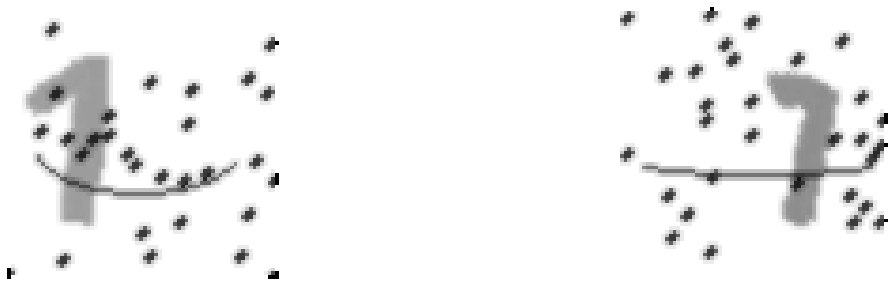

In [6]:
# plot two examples
def plot_ (img1, img2) :
  plt.figure(figsize = (20,5))
  
  plt.subplot(1,2,1)
  plt.imshow(img1, 'gray')
  
  plt.axis('off')
  
  plt.subplot(1,2,2)
  plt.imshow(img2, 'gray')
  
  plt.axis('off')


path1 = TRAIN_PATH + '/task1/uulAapmWDNnsk4dh.png'
path2 = TRAIN_PATH + '/task1/xV5PaF4Qkk8qasZF.png'

img1 = cv2.imread(path1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(path2, cv2.IMREAD_GRAYSCALE)

plot_(img1, img2)


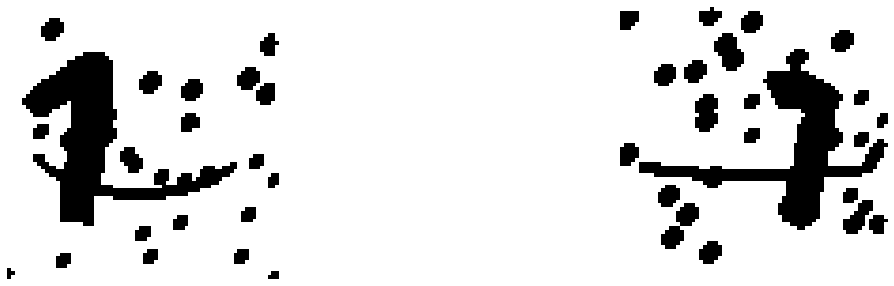

In [7]:
# adaptive thresholding : Algorithms determine the threshold for a pixel based on its surrounding regions
thresh_img1 = cv2.adaptiveThreshold(img1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)
thresh_img2 = cv2.adaptiveThreshold(img2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)
plot_(thresh_img1, thresh_img2)

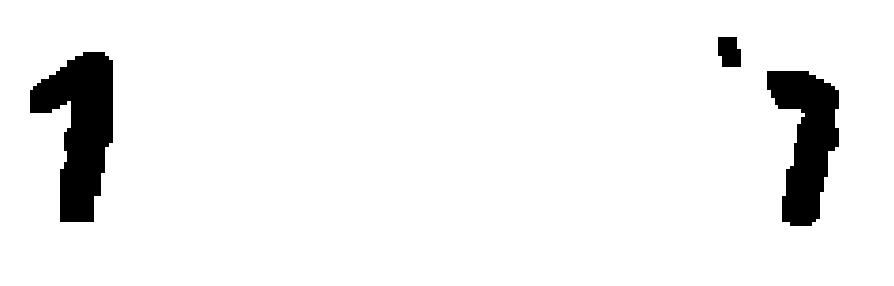

In [8]:
# Erosion close : used to remove some noise
close_img1 = cv2.morphologyEx(thresh_img1, cv2.MORPH_CLOSE, np.ones((5,5), np.uint8))
close_img2 = cv2.morphologyEx(thresh_img2, cv2.MORPH_CLOSE, np.ones((5,5), np.uint8))
plot_(close_img1, close_img2)

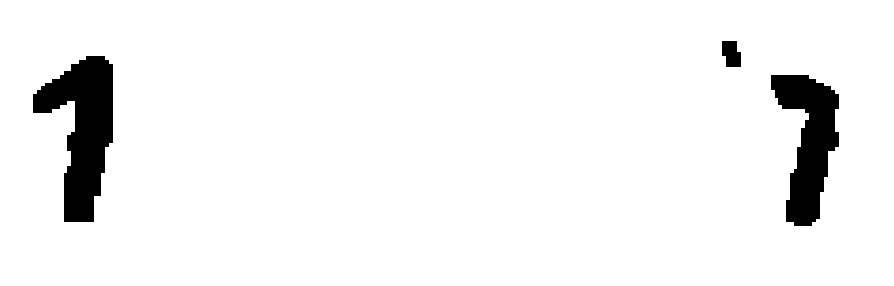

In [9]:
# Dilation
dilate_img1 = cv2.dilate(close_img1, np.ones((2,2), np.uint8), iterations = 1)
dilate_img2 = cv2.dilate(close_img2, np.ones((2,2), np.uint8), iterations = 1)
plot_(dilate_img1, dilate_img2)

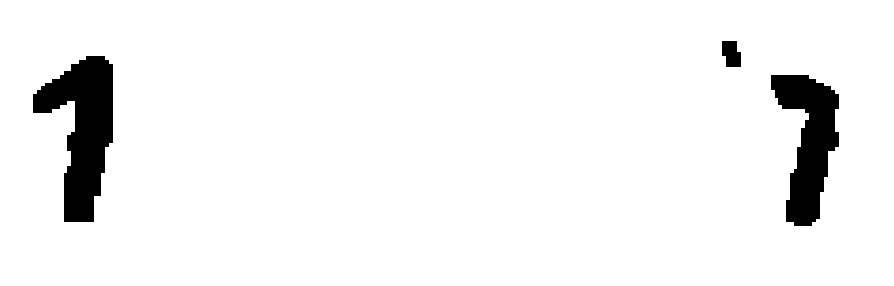

In [10]:
# Gaussian blurring : help use remove more noise
gauss_img1 = cv2.GaussianBlur(dilate_img1, (1,1), 0)
gauss_img2 = cv2.GaussianBlur(dilate_img2, (1,1), 0)
plot_(gauss_img1, gauss_img2)

# Preprocess image

In [11]:
# preprocessing step for task 1
def preprocessing(img):
  a_img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)
  c_img = cv2.morphologyEx(a_img, cv2.MORPH_CLOSE, np.ones((5,5), np.uint8))
  d_img = cv2.dilate(c_img, np.ones((2,2), np.uint8), iterations = 1)
  g_img = cv2.GaussianBlur(d_img, (1,1), 0)

  return g_img


In [12]:
from tensorflow.keras.utils import img_to_array

x_train = [] # [ ['task1/aoRRfheQJeU3LFd4.png' '0'] ['task1/uqctCAnyY2UCgN2A.png' '3']
y_train = []
x_val = []
y_val = []
# read all images in task 1
count = 0
with open(f'{TRAIN_PATH}/annotations.csv', newline='') as csvfile:
  for row in csv.reader(csvfile, delimiter=','):
    if(row[0][:5]!="task1"):
      continue
    if(count%100 == 0):
      print(f"load {count} data")
    count+=1

    img = cv2.imread(os.path.join(TRAIN_PATH, row[0]), cv2.IMREAD_GRAYSCALE)
    img = preprocessing(img)
    img_arr = img_to_array(img)
    # train-test split
    if random.random() < 0.8:
      x_train.append(img_arr)
      y_train.append(row[1])
    else:
      x_val.append(img_arr)
      y_val.append(row[1])

x_train = np.array(x_train)
y_train = np.array(y_train)
x_train /= 255.0

x_val = np.array(x_val)
x_val /= 255.0
y_val = np.array(y_val)

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)


load 0 data
load 100 data
load 200 data
load 300 data
load 400 data
load 500 data
load 600 data
load 700 data
load 800 data
load 900 data
load 1000 data
load 1100 data
load 1200 data
load 1300 data
load 1400 data
load 1500 data
load 1600 data
load 1700 data
load 1800 data
load 1900 data
(1600, 72, 72, 1)
(1600,)
(400, 72, 72, 1)


[]

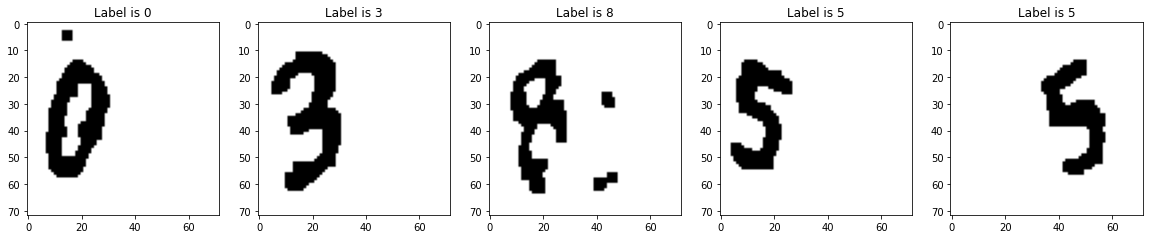

In [13]:
plt.figure(figsize = (20,5))
for i in range(5) :
  plt.subplot(1,5,i+1)
  plt.imshow(x_train[i][:,:,0].squeeze(), 'gray')
  plt.title('Label is ' + str(y_train[i]))
plt.plot()

# one hot encoding

In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# count label
temp = set(y_train)
for t in temp :
  print('Occurance count of ' + t + ' : ' + str(len(y_train[y_train == t])))

y_train_combine = LabelEncoder().fit_transform(y_train)
y_train_one_hot = OneHotEncoder(sparse = False).fit_transform(y_train_combine.reshape(len(y_train_combine),1))
y_val_combine = LabelEncoder().fit_transform(y_val)
y_val_one_hot = OneHotEncoder(sparse = False).fit_transform(y_val_combine.reshape(len(y_val_combine),1))

combine_to_label = {y_train_combine[i] : y_train[i] for i in range(len(y_train))}
print(combine_to_label)
#print(y_train_one_hot)

Occurance count of 6 : 136
Occurance count of 4 : 163
Occurance count of 8 : 162
Occurance count of 2 : 166
Occurance count of 9 : 180
Occurance count of 5 : 154
Occurance count of 0 : 163
Occurance count of 1 : 145
Occurance count of 3 : 168
Occurance count of 7 : 163
{0: '0', 3: '3', 8: '8', 5: '5', 4: '4', 2: '2', 9: '9', 7: '7', 6: '6', 1: '1'}


# Model Creation

In [15]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization

from keras.layers import Dropout
from keras.layers import Input

In [16]:
print(x_train.shape)
print(y_train_one_hot.shape)
print(x_val.shape)
print(y_val_one_hot.shape)

(1600, 72, 72, 1)
(1600, 10)
(400, 72, 72, 1)
(400, 10)


In [17]:
# define layers
def conv_layer (filterx) :
    
  model = Sequential()
  
  model.add(Conv2D(filterx, (3,3), padding = 'same', activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))
  model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
    
  return model

def dens_layer (hiddenx) :
    
  model = Sequential()
  
  model.add(Dense(hiddenx, activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))
  
  return model

# cnn
def cnn (filter1, filter2, filter3, hidden1, hidden2) :
    
  model = Sequential()
  model.add(Input((72, 72, 1,)))
  
  model.add(conv_layer(filter1))
  model.add(conv_layer(filter2))
  model.add(conv_layer(filter3))
  
  model.add(Flatten())
  model.add(dens_layer(hidden1))
  model.add(dens_layer(hidden2))
  
  model.add(Dense(10, activation = 'softmax'))
  
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  
  return model

# Data augmentaion

In [18]:
from keras.preprocessing.image import ImageDataGenerator

img_gen = ImageDataGenerator(rotation_range=5, width_shift_range=[-2, 2])
img_gen.fit(x_train)
train_set = img_gen.flow(x_train, y_train_one_hot)
trainX, trainY = train_set.next()

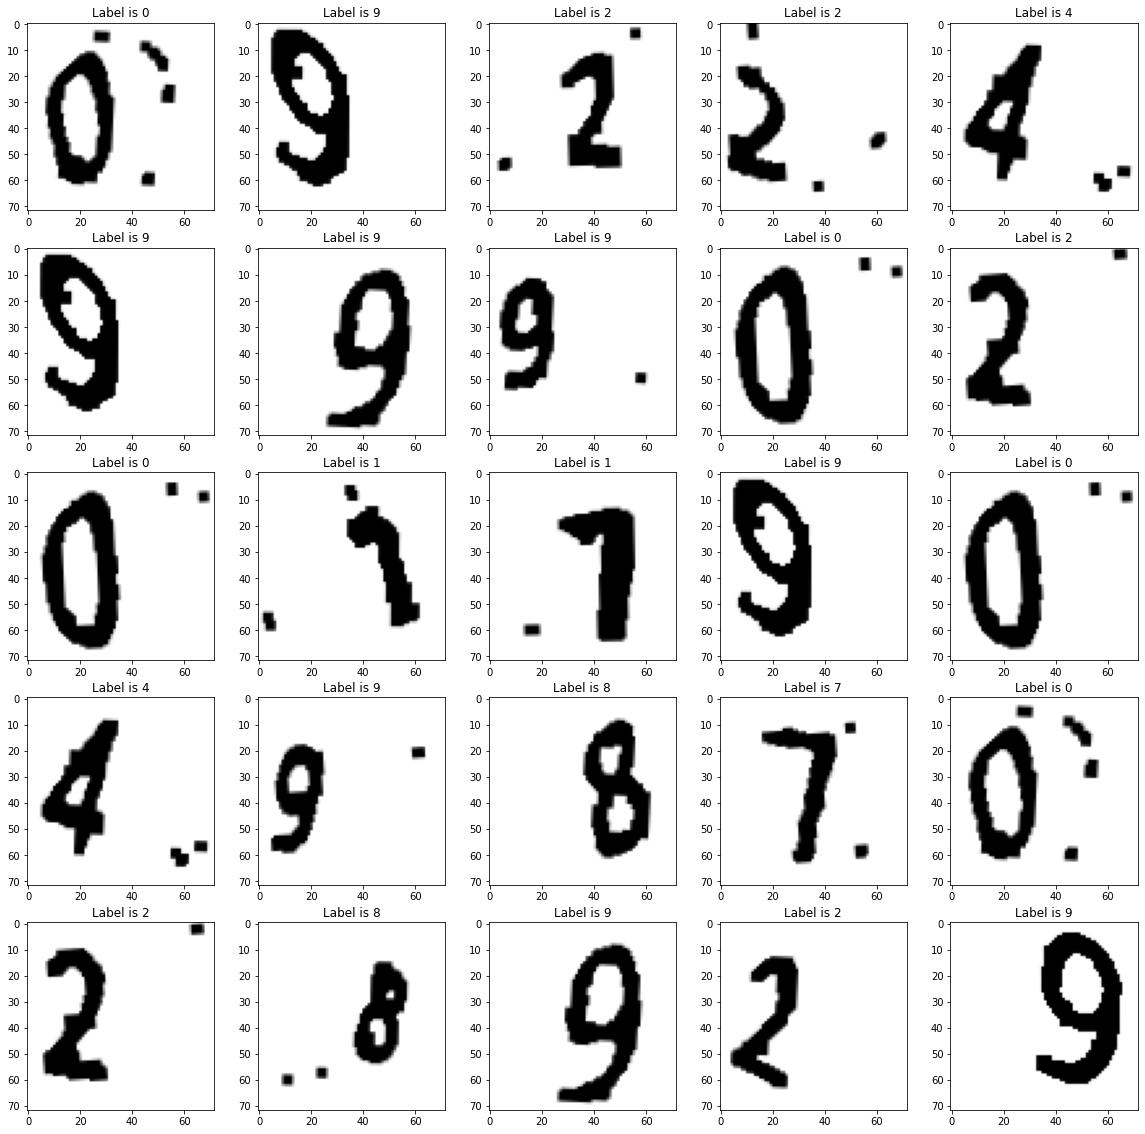

In [19]:
# showcase
plt.figure(figsize = (20,20))

hi = 32
lo = 0

for i in range(25) :
    plt.subplot(5,5,i+1)
    x = np.random.randint(lo, hi)
    plt.imshow(trainX[x][:,:,0].squeeze(), 'gray')
    plt.title('Label is ' + str(combine_to_label[np.argmax(trainY[x])]))
plt.show()

# Model Training

In [20]:
# check on train set
print(x_train.shape)
print(y_train_one_hot.shape)
# model parameters
model = cnn(128, 32, 16, 32, 32)
model.summary()

(1600, 72, 72, 1)
(1600, 10)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 36, 36, 128)       1792      
                                                                 
 sequential_2 (Sequential)   (None, 18, 18, 32)        37024     
                                                                 
 sequential_3 (Sequential)   (None, 9, 9, 16)          4688      
                                                                 
 flatten (Flatten)           (None, 1296)              0         
                                                                 
 sequential_4 (Sequential)   (None, 32)                41632     
                                                                 
 sequential_5 (Sequential)   (None, 32)                1184      
                                                                 
 dense_2 (Dense)           

## Model checkpoint

In [21]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau # learning rate decreasing

check_point = ModelCheckpoint('drive/MyDrive/task1_model.h5', monitor = 'val_loss', verbose = 1, save_best_only = True)
# reduction on lr
reduce = ReduceLROnPlateau(monitor = 'val_loss', patience = 20, verbose = 1)
# check on train set
print(x_train.shape)
print(y_train_one_hot.shape)

(1600, 72, 72, 1)
(1600, 10)


In [ ]:
# start training
history = model.fit(img_gen.flow(x_train, y_train_one_hot, batch_size = 32), 
          validation_data = (x_val, y_val_one_hot), epochs = 100, 
          steps_per_epoch = len(x_train)/32, callbacks = [check_point])

Text(0.5, 1.0, 'Model accuracy wrt Epoch')

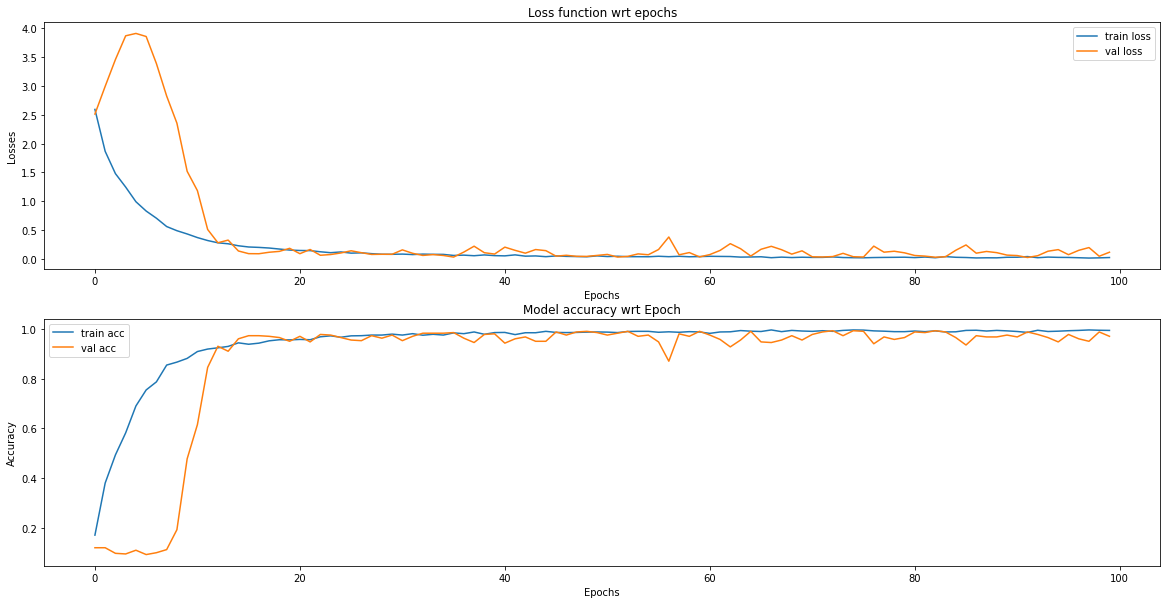

In [23]:
# plot training result
plt.figure(figsize = (20,10))
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend(['train loss','val loss'])
plt.title('Loss function wrt epochs')

plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train acc' , 'val acc'])
plt.title('Model accuracy wrt Epoch')

# Prediction

In [38]:
from keras.models import load_model

model = load_model("./task1_model.h5")
# make prediction on x_test
x_test = []
count = 0
for image_p in os.listdir( os.path.join(TEST_PATH, 'task1') ):
  if(count % 1000 == 0):
    print(f"{count} data read")
  count+=1

  img = cv2.imread( os.path.join(TEST_PATH, 'task1', image_p), cv2.IMREAD_GRAYSCALE)
  img = preprocessing(img)
  img_arr = img_to_array(img)
  x_test.append(img_arr)
  
x_test = np.array(x_test)
print(x_test.shape)
pred = model.predict(x_test)
print(pred[0])
pred = np.argmax(pred, axis=1)
print(pred[0])

# write submission csv
if os.path.exists('drive/MyDrive/kaggle/submission.csv'):
  csv_writer = csv.writer(open('drive/MyDrive/kaggle/submission.csv', 'a', newline=''))
else:
  csv_writer = csv.writer(open('drive/MyDrive/kaggle/submission.csv', 'w', newline=''))
  csv_writer.writerow(["filename", "label"])

i = 0
for image_p in os.listdir( os.path.join(TEST_PATH, 'task1') ):
  csv_writer.writerow(['task1/'+image_p, pred[i]])
  i += 1

0 data read
1000 data read
2000 data read
3000 data read
4000 data read
5000 data read
6000 data read
(6500, 72, 72, 1)
204/204 [==============================] - 1s 6ms/step
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
5


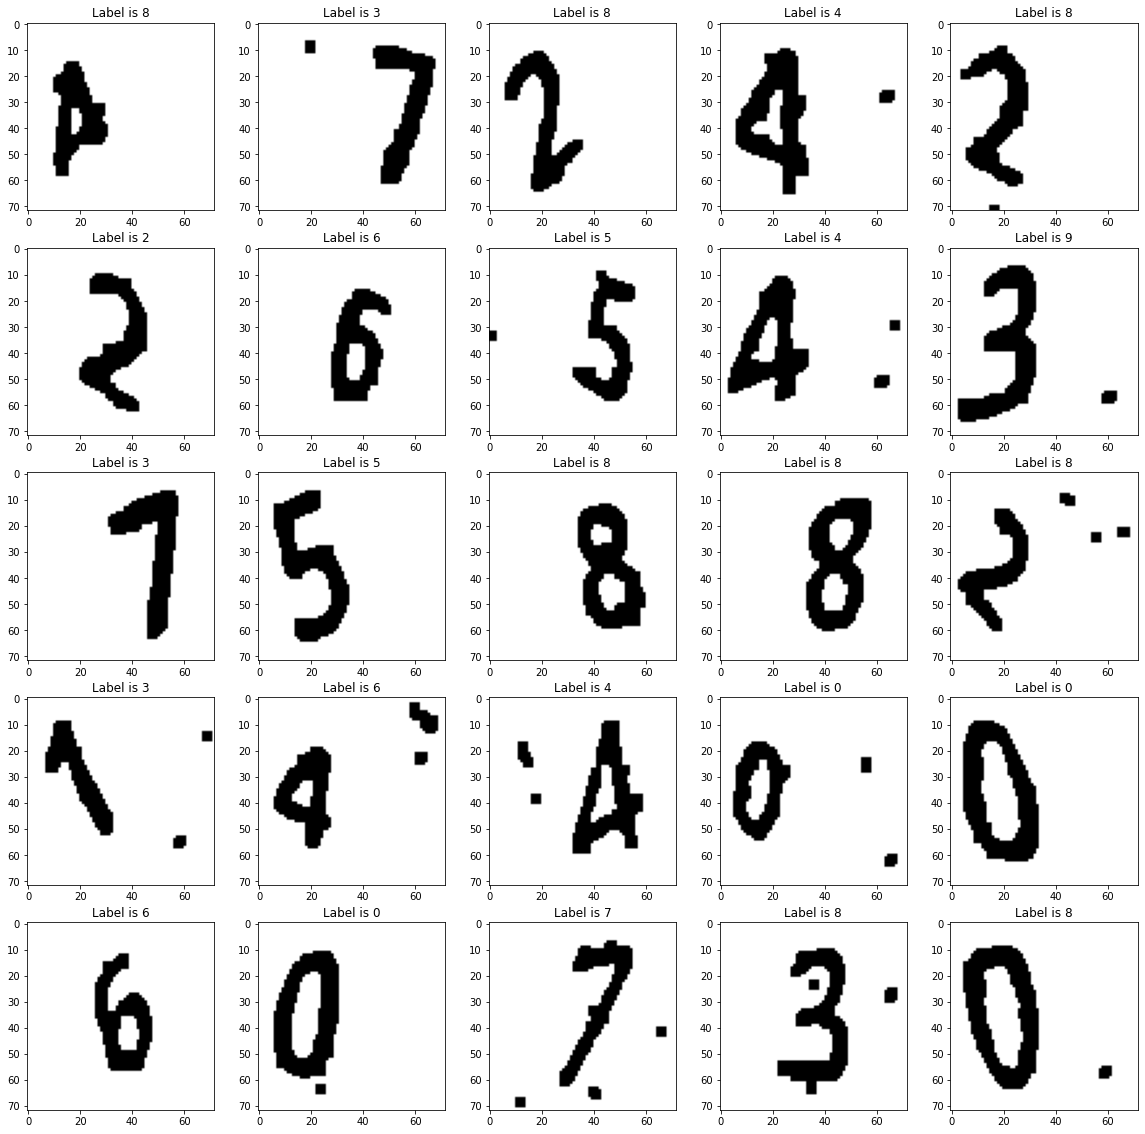

In [39]:
# take a look at prediction
plt.figure(figsize = (20,20))

lo = 0
hi = 6000

for i in range(25) :
    plt.subplot(5,5,i+1)
    x = np.random.randint(lo, hi)
    plt.imshow(x_test[x][:,:,0].squeeze(), 'gray')
    plt.title('Label is ' + str(pred[x]))
plt.show()